Path (indices): [(51, 96), (52, 97), (53, 98), (54, 99), (55, 99), (56, 99), (57, 99), (58, 99), (59, 99), (60, 99), (61, 99), (62, 99), (63, 99), (64, 99), (65, 99), (66, 99), (67, 99), (68, 99), (69, 99), (70, 99), (71, 99), (72, 99), (73, 99), (74, 99), (75, 99), (76, 99), (77, 99), (78, 99), (79, 99), (80, 99), (81, 99), (82, 99), (83, 99), (84, 99), (85, 99), (86, 99), (87, 99), (88, 99), (89, 99), (90, 99), (91, 99), (92, 99), (93, 99), (94, 99), (95, 99), (96, 99), (97, 99), (98, 99), (99, 99), (99, 98), (99, 97), (99, 96), (99, 95), (99, 94), (99, 93), (99, 92), (99, 91), (99, 90), (99, 89), (99, 88), (99, 87), (99, 86), (99, 85), (99, 84), (99, 83), (99, 82), (99, 81), (99, 80), (99, 79), (99, 78), (99, 77), (99, 76), (99, 75), (99, 74), (99, 73), (99, 72), (99, 71), (99, 70), (99, 69), (99, 68), (99, 67), (99, 66), (99, 65), (99, 64), (99, 63), (99, 62), (99, 61), (99, 60), (99, 59), (99, 58), (99, 57), (99, 56), (99, 55), (99, 54), (99, 53), (99, 52), (99, 51), (99, 50), (99

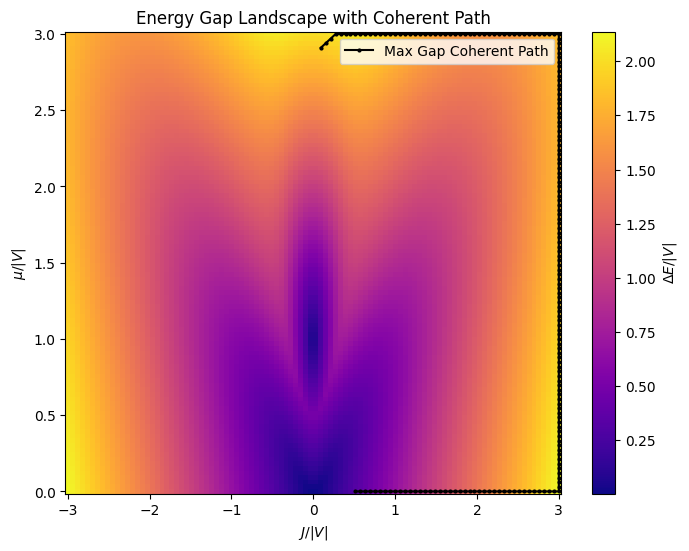

In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import pandas as pd

def find_coherent_max_gap_path(energy_gap_landscape, start, end):
    rows, cols = energy_gap_landscape.shape
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0),  # Right, down, left, up
                  (1, 1), (-1, -1), (1, -1), (-1, 1)]  # Diagonals

    pq = [(-energy_gap_landscape[start], [start], start, None)]
    visited = set()

    while pq:
        neg_total_gap, path, (i, j), prev_dir = heapq.heappop(pq)
        total_gap = -neg_total_gap

        if (i, j) == end:
            return path, total_gap

        # Mark as visited
        if (i, j) in visited:
            continue
        visited.add((i, j))

        # Explore neighbors with continuity constraints
        for di, dj in directions:
            ni, nj = i + di, j + dj
            if 0 <= ni < rows and 0 <= nj < cols and (ni, nj) not in visited:
                # Enforce continuity by prioritizing similar directions
                if prev_dir is not None and (di, dj) != prev_dir:
                    continuity_penalty = 0.5  # Penalize changes in direction
                else:
                    continuity_penalty = 0

                new_total_gap = total_gap + energy_gap_landscape[ni, nj] - continuity_penalty
                new_path = path + [(ni, nj)]
                heapq.heappush(pq, (-new_total_gap, new_path, (ni, nj), (di, dj)))

    return None, None  # Return None if no path is found

def plot_energy_gap_landscape_with_path(energy_gap_landscape, path, mu_V_ratios, J_V_ratios):
    plt.figure(figsize=(8, 6))

    J_V_ratio_grid, mu_V_ratio_grid = np.meshgrid(J_V_ratios, mu_V_ratios, indexing='ij')

    plt.pcolormesh(J_V_ratio_grid, mu_V_ratio_grid, energy_gap_landscape, shading='auto', cmap='plasma')
    plt.colorbar(label="$\\Delta E / |V|$")
    plt.title("Energy Gap Landscape")
    plt.xlabel("$J/|V|$")
    plt.ylabel("$\\mu/|V|$")

    # Plot the path
    if path:
        path_indices = np.array(path)
        J_path = J_V_ratios[path_indices[:, 0]]
        mu_path = mu_V_ratios[path_indices[:, 1]]
        plt.plot(J_path, mu_path, marker='o', color='k', markersize=2, label='Max Gap Coherent Path')
        plt.legend()

    plt.show()

def ratio_to_index(ratio, ratio_array):
    """
    Convert a specified ratio to the nearest index in a given ratio array.
    """
    return np.abs(ratio_array - ratio).argmin()

resolution = 100
min_V_J_ratio = -3
max_V_J_ratio = 3
max_mu_V_ratio = 3

energy_gap_df = pd.read_csv(f"energy_gap_over_V_resolution={resolution}.csv")
energy_gap_landscape = energy_gap_df.to_numpy()

mu_V_ratios = np.linspace(0, max_mu_V_ratio, resolution)
J_V_ratios = np.linspace(min_V_J_ratio, max_V_J_ratio, resolution)

start_J_ratio = 0.1
start_mu_ratio = 2.9
end_J_ratio = 0.5
end_mu_ratio = 0

start_index = (ratio_to_index(start_J_ratio, J_V_ratios), ratio_to_index(start_mu_ratio, mu_V_ratios))
end_index = (ratio_to_index(end_J_ratio, J_V_ratios), ratio_to_index(end_mu_ratio, mu_V_ratios))

# Find a coherent path maximizing the energy gap
path, total_gap = find_coherent_max_gap_path(energy_gap_landscape, start_index, end_index)

if path:
    print("Path (indices):", path)
    print("Total energy gap along the path:", total_gap)
else:
    print("No path found")

plot_energy_gap_landscape_with_path(energy_gap_landscape, path, mu_V_ratios, J_V_ratios)
